In [17]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# About the data 
the data explains about the number of hours of studing and the scores getting accordingly to the students, the dataset consists of columns(hours, scores and serial number which is number of students )

In [19]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


identified first 10 of the coulumn and row

In [21]:
s_data.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [22]:
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Missing value

In [23]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [28]:
s_data.shape

(25, 2)

In [26]:
s_data.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

all the information about the data is loaded through .info  , explaining how many rows and how many columns which  includes 25 rows and 3 column. 


In [29]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


drawing data points on the two-dimensional graph to focus on the dataset and see if we can manually find any relationship between the data.

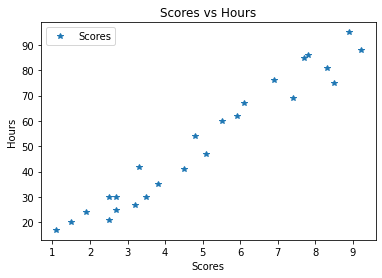

In [31]:
s_data.plot(x='Hours', y='Scores', style='*')
plt.title('Scores vs Hours')
plt.xlabel('Scores')
plt.ylabel('Hours')
plt.show()

this shows that as the hours increase the scores also increase. 

In [34]:
X = s_data.iloc[:, :-1].values # Scores
y = s_data.iloc[:, 1].values   # Hours]

In [36]:
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

The attributes are stored in the X variable. We specified “-1” as the range for columns since we wanted our attribute set to contain all the columns except the last one, which is “SalesPrice”. Similarly the y variable contains the labels. We specified 1 for the label column since the index for “SalesPrice” column is 1.

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We’ll do this by using Scikit-Learn built-in train_test_split() method:

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

The above script splits 80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the proportion of test set.

In [38]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm

In [39]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


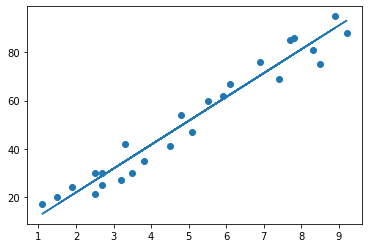

In [40]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

the above graph shows the linear regression the line going in upward direction according to hours and scores 

# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [41]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


according to this we can predict that it took 1.5 to 5.9 hours 

In [42]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


in some cases our prediction is less and in some cases our prediction is high

# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.


In [45]:

from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


# co relation analysis

<AxesSubplot:>

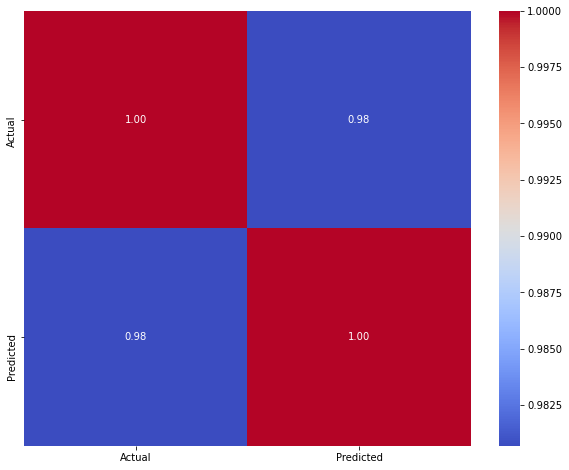

In [46]:
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
# No correlation found.

array([[<AxesSubplot:title={'center':'Actual'}>,
        <AxesSubplot:title={'center':'Predicted'}>]], dtype=object)

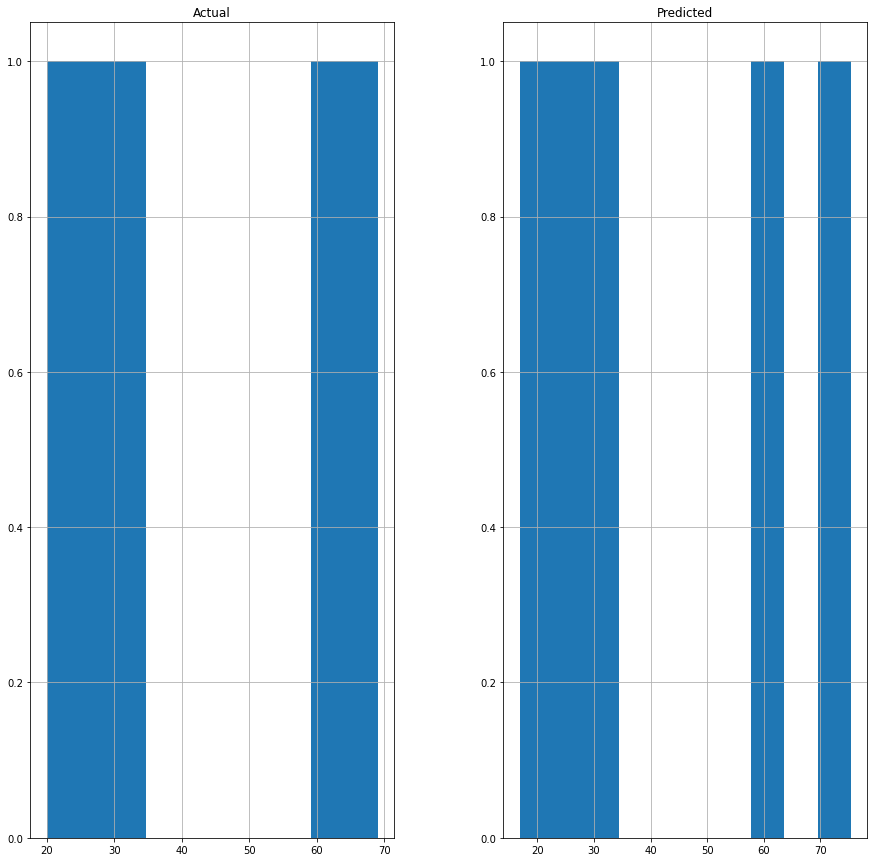

In [47]:
df.hist(figsize=(15,15))

In [50]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


The mean error coming in the data is 4.18 which is done predicting y_test and x_tes.

# conclusion 
This task makes me experience about linear regression in more detail , we get to see that hours and scores are in relation with each other and also they are corelated , the hours are basiclly studying hours of student and scores whichever they are getting after stdying for that number of hours. so more number of hours of study , the more scores they are receiving. 